# Hotel Reservation Dataset 

Online hotel booking has radically changed booking options and customer behavior. A significant number of hotel reservations are canceled due to cancellations or no-shows. Typical reasons for cancellations include changes in plans, scheduling conflicts, etc. This is often facilitated by the ability to do this for free or preferably at low cost, which is possible for hotel guests, but is less desirable and perhaps a decreasing revenue factor for hotels to manage. .

Can we predict if the customer will honor the reservation or cancel it?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/nathan/Desktop/Étude Perso/DataSience/Machine Learning Project/Hotel Reservations.csv')
data_copy = data.copy()
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [2]:
data.shape

(36275, 19)

In [3]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [4]:
for column in data.select_dtypes('object'):
    if not column == 'Booking_ID':
        print(f'{column :-<50} {data[column].unique()}')

type_of_meal_plan--------------------------------- ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved-------------------------------- ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type------------------------------- ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking_status------------------------------------ ['Not_Canceled' 'Canceled']


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Basic Analysis

Important: The conclusions of the analyzes which are presented below are only hypotheses. Assumptions that we can develop further with further research.

In [6]:
data.booking_status.value_counts(normalize = True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

**Balanced/Unbalenced dataset** :  We can see that our classes are not really balanced (67 / 32) but not very unbalanced either, so we will use as metrics, F1 score, sensitivity or accuracy.

In [7]:
pd.crosstab(data.no_of_previous_cancellations, data.booking_status)

booking_status,Canceled,Not_Canceled
no_of_previous_cancellations,,
0,11869,24068
1,11,187
2,0,46
3,1,42
4,0,10
5,0,11
6,0,1
11,0,25
13,4,0


**Previous Cancellation / Target** 

We can see that the people who have canceled their reservation the most are not those who have already canceled in the past. (Most cancellations were made by people who may not have canceled before or who may have never been to this hotel). Also important note, people who have canceled 13 times in the past have always canceled afterwards.

In [8]:
pd.crosstab(data.market_segment_type, data.booking_status)

booking_status,Canceled,Not_Canceled
market_segment_type,,
Aviation,37,88
Complementary,0,391
Corporate,220,1797
Offline,3153,7375
Online,8475,14739


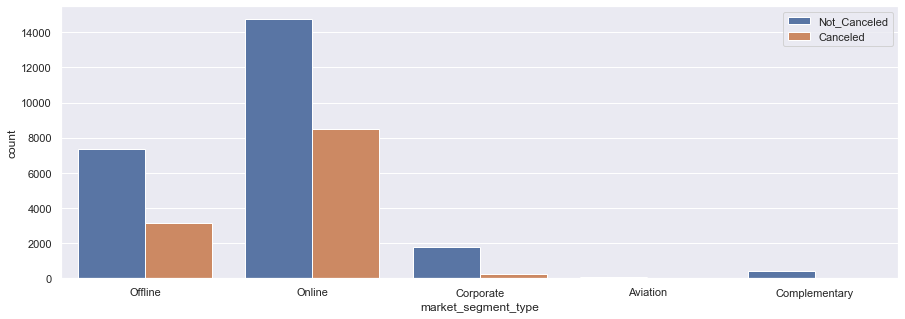

In [9]:
plt.figure(figsize=[15,5])
sns.set()
sns.countplot(x = 'market_segment_type', hue = 'booking_status', data = data)
plt.legend(loc = 1);

**Market / Target:**

We can see that 57.5% of Online market customers have canceled their reservation (We can possibly deduce that this is due to the ease of cancellation). The Offline market and the Aviation market have 42% cancellation (Aviation may be due to unforeseen changes (hypothesis)), while the Corporate market and the Complementary market are the safest and have higher rates. very low cancellation rate, even zero (12% and 0%)

In [10]:
data.groupby('arrival_month')['booking_status'].value_counts(normalize = True)  

arrival_month  booking_status
1              Not_Canceled      0.976331
               Canceled          0.023669
2              Not_Canceled      0.747653
               Canceled          0.252347
3              Not_Canceled      0.703138
               Canceled          0.296862
4              Not_Canceled      0.636330
               Canceled          0.363670
5              Not_Canceled      0.635104
               Canceled          0.364896
6              Not_Canceled      0.596940
               Canceled          0.403060
7              Not_Canceled      0.550000
               Canceled          0.450000
8              Not_Canceled      0.609756
               Canceled          0.390244
9              Not_Canceled      0.666450
               Canceled          0.333550
10             Not_Canceled      0.646417
               Canceled          0.353583
11             Not_Canceled      0.706376
               Canceled          0.293624
12             Not_Canceled      0.866931
    

**Date / Target:**

We can see that we have the most cancellations(2017, 2018 combined) between the months of June and August with a peak cancellation in July of 45%. The months with the lowest cancellation rate are December January.

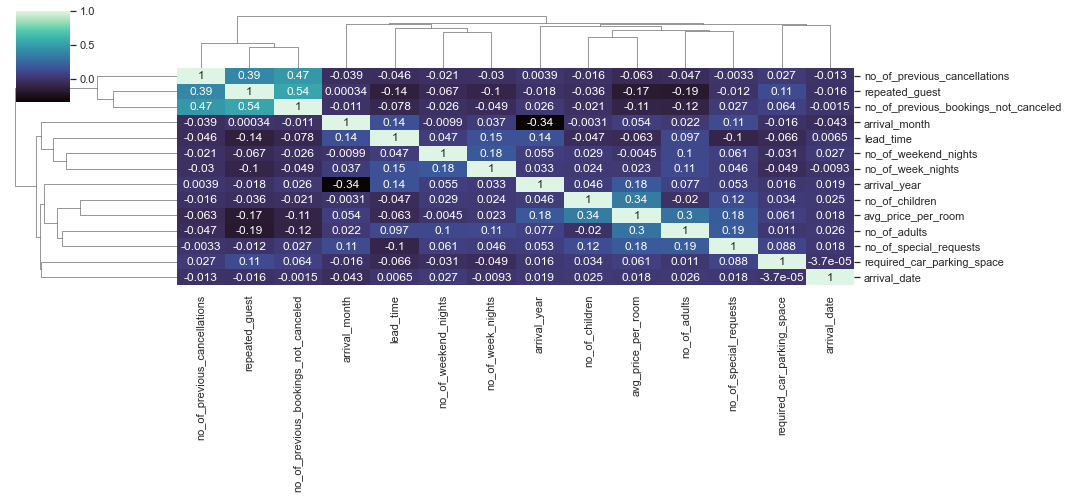

In [11]:
sns.clustermap(data.corr(), annot = True, figsize = [15,7], cmap="mako"); 

We can see that we have some variables (top left square) that have a strong correlation between them (to watch for further analysis)

# Preprocessing

## Encoding

In [12]:
data.dtypes.value_counts()

int64      13
object      5
float64     1
dtype: int64

In [13]:
def encodage(data):
    
    for column, content in data.items():        # object -> category 
        if (pd.api.types.is_object_dtype(content)):
            data[column] = content.astype('category').cat.as_ordered()
            
    for column, content in data.items():       # category -> integer (+1)
        if pd.api.types.is_categorical_dtype(content):
            data[column] =  pd.Categorical(content).codes + 1

In [14]:
encodage(data)

In [15]:
data.dtypes.value_counts()  # after encoding

int64      13
int8        4
int32       1
float64     1
dtype: int64

## Modelling

In [16]:
X = data.drop('booking_status', axis = 1)
Y = data.booking_status

In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

np.random.seed(0)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8551343900758098

In [18]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
    
y_pred = model.predict(x_test)

print(confusion_matrix(y_test, y_pred)) 

[[1865  536]
 [ 515 4339]]


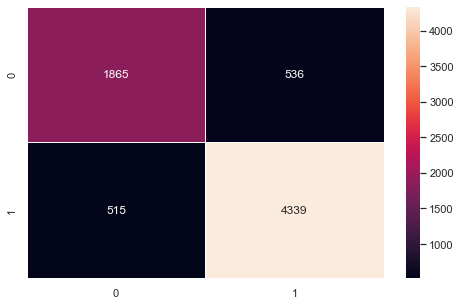

In [19]:
plt.figure(figsize=[8,5])
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'g', linewidths=1);

We can see that for 2401 cancellation cases, we have 1865 that were indeed predicted as cancelled. (78% correct).

We also have that of the 4854 cases that didn't cancel, the model predicted that 4339 canceled (89.3% correct)

So in conclusion 536 cases of cancellation which were predicted as not canceled (22.32% error) and 515 cases of non-cancelled which were predicted as canceled (10.5% error).

In [20]:
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           1       0.78      0.78      0.78      2401
           2       0.89      0.89      0.89      4854

    accuracy                           0.86      7255
   macro avg       0.84      0.84      0.84      7255
weighted avg       0.85      0.86      0.85      7255



## Basic Optimisation

### Features Importance¶

In [21]:
model.feature_importances_, pd.DataFrame(model.feature_importances_, index = x_train.columns)

(array([9.44568877e-02, 2.45219202e-02, 3.47200636e-03, 3.21227366e-02,
        3.84987001e-02, 9.76951535e-03, 5.52163905e-03, 9.79952367e-03,
        3.28445480e-01, 1.33202535e-02, 6.42569007e-02, 6.25463355e-02,
        9.45542676e-02, 6.10612550e-04, 2.48976039e-04, 1.07775183e-04,
        1.49792096e-01, 6.79543739e-02]),
                                              0
 Booking_ID                            0.094457
 no_of_adults                          0.024522
 no_of_children                        0.003472
 no_of_weekend_nights                  0.032123
 no_of_week_nights                     0.038499
 type_of_meal_plan                     0.009770
 required_car_parking_space            0.005522
 room_type_reserved                    0.009800
 lead_time                             0.328445
 arrival_year                          0.013320
 arrival_month                         0.064257
 arrival_date                          0.062546
 market_segment_type                   0.09455

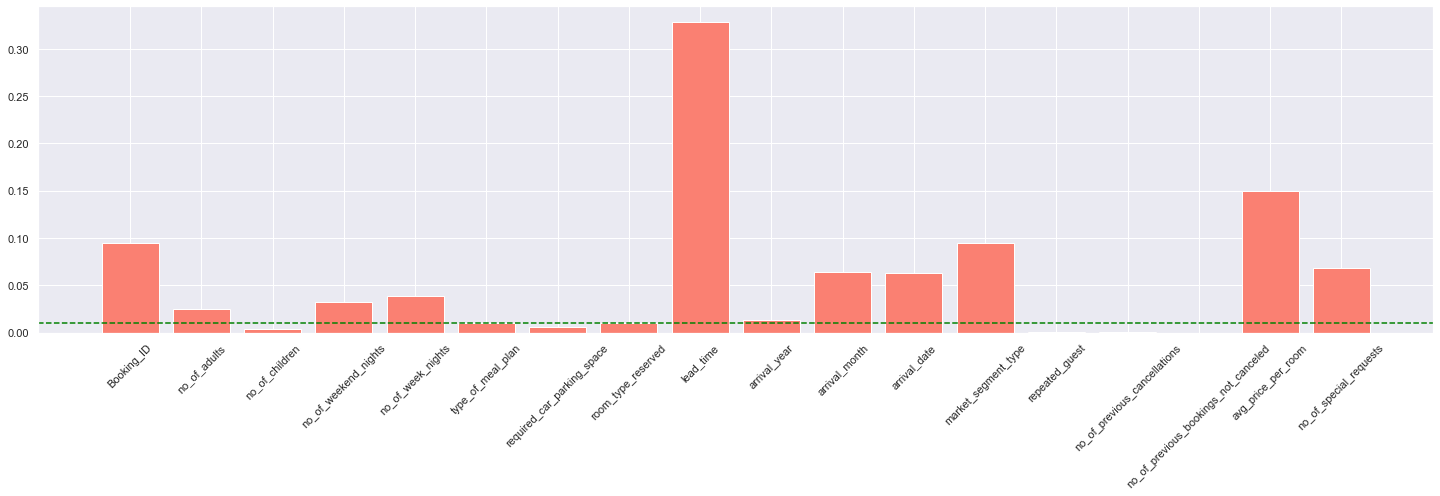

In [22]:
plt.figure(figsize=[25,6])
plt.bar(x = x_train.columns, height= model.feature_importances_, color = 'salmon')
plt.axhline(y = 0.01, ls = '--', color = 'green')
plt.xticks(rotation = 45);  

**Features Importance :** 

We can see that the 'lead time' variables as well as 'no_of_previous_booking_not_canceled', or even the 'market_segment_type' are the variables that are the most important for our decision tree. During a more in-depth study, we can therefore for example give a minimum threshold (0.01 for example) and the variables which are below this threshold we eliminate them. This could **possibly** improve our model. (To test)

## Advanced optimization

### Feature Selection

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline

np.random.seed(0)

model_opt = make_pipeline(SelectKBest(f_classif, k = 17),
                          DecisionTreeClassifier())

model_opt.fit(x_train, y_train)
model_opt.score(x_test, y_test)

0.8683666436940042

In [24]:
y_pred2 = model_opt.predict(x_test)

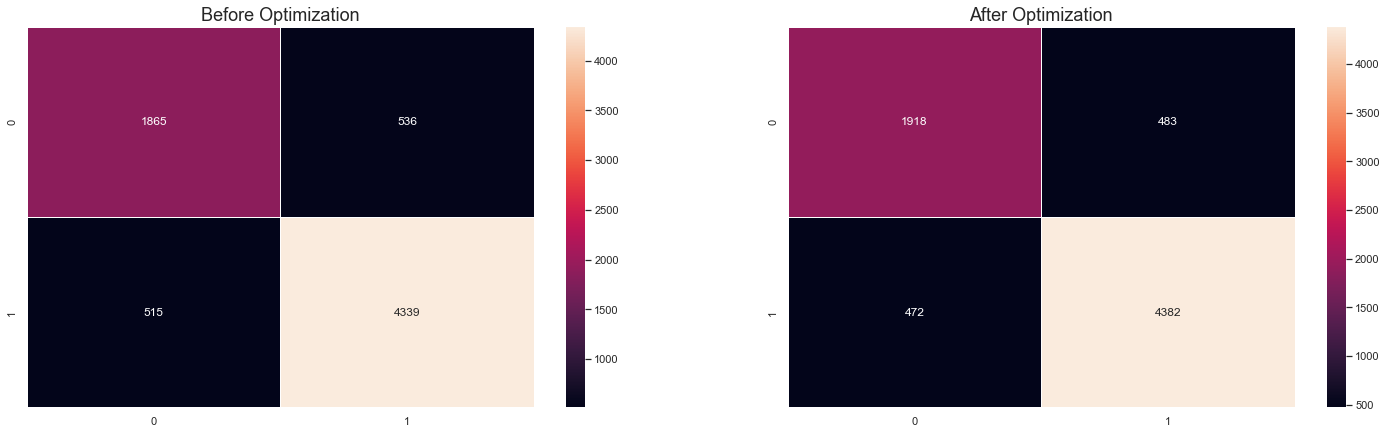

In [25]:
plt.figure(figsize=[25,7])
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'g', linewidths=1)
plt.title('Before Optimization', fontdict= {'fontsize': 18})

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred2), annot = True, fmt = 'g', linewidths=1)
plt.title('After Optimization', fontdict= {'fontsize': 18});

**Conclusion:** We can see that when we do Feature Selection keeping 17 / 18 of the best variables, our model improves:

* score: before = 85.5%, after = 86.8%

* recall / f1_score: before = 78% / 89%, after = 80% / 90% (1918 good predictions regarding cancellations against 1865 before). While concerning the True Negative, the model made 4382 good predictions concerning the non_cancellation against 4339 during the initial model!

* precision: before = 78 / 89, after = 80, 90.

## Select The best Model

In [26]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
# svm is not present because more suitable for small datasets (1000-10000 data)

lst_model = [DecisionTreeClassifier(random_state=0), RandomForestClassifier(random_state=0), AdaBoostClassifier(random_state=0), KNeighborsClassifier()]

In [27]:
def evaluate_model(lst_model): 
    
    global x_train, x_test, y_train, y_test
    
    for element in lst_model :
        
        np.random.seed(0)
        best_model = make_pipeline(SelectKBest(f_classif, k = 17),
                                    element)

        best_model.fit(x_train, y_train)
        score = best_model.score(x_test, y_test)
        y_pred = best_model.predict(x_test)
        class_report = classification_report(y_test, y_pred)
        
        print(f'The score of {element} model : {score} and the F1 Score is {f1_score(y_test, y_pred)}')

In [28]:
evaluate_model(lst_model)

The score of DecisionTreeClassifier(random_state=0) model : 0.8683666436940042 and the F1 Score is 0.8006679190148196
The score of RandomForestClassifier(random_state=0) model : 0.9061337008959338 and the F1 Score is 0.8511475409836065
The score of AdaBoostClassifier(random_state=0) model : 0.819710544452102 and the F1 Score is 0.7121478873239437
The score of KNeighborsClassifier() model : 0.8033080634045486 and the F1 Score is 0.6729314691725876


**Conclusion ;**

We see that out of the four models, two of them are very interesting and offer us very good performance (DecisionTreeClassifier (86.8%) and RandomForestClassifier (90.6%)). However, given our Dataset which is unbalenced we will keep the RandomForest because the Score F1 is 85 against 80 for the DecisionTree.

### Testing best estimator (for further analysis use the RandomSearchCV or the GridSearchCV)¶

In [29]:
def testing_hyper():
    
    for i in range(80,260, 20):

        np.random.seed(0)
        final_model = make_pipeline(SelectKBest(f_classif, k = 17),
                                        RandomForestClassifier(n_estimators= i, random_state=0))

        final_model.fit(x_train, y_train)
        score = final_model.score(x_test, y_test)
        print(f'With the estimator : {i}, The score is : {score} and the F1 Score is {f1_score(y_test, y_pred)}')

In [30]:
testing_hyper()

With the estimator : 80, The score is : 0.9059958649207444 and the F1 Score is 0.780171512235934
With the estimator : 100, The score is : 0.9061337008959338 and the F1 Score is 0.780171512235934
With the estimator : 120, The score is : 0.9053066850447967 and the F1 Score is 0.780171512235934
With the estimator : 140, The score is : 0.9057201929703652 and the F1 Score is 0.780171512235934
With the estimator : 160, The score is : 0.9055823569951758 and the F1 Score is 0.780171512235934
With the estimator : 180, The score is : 0.9061337008959338 and the F1 Score is 0.780171512235934
With the estimator : 200, The score is : 0.9059958649207444 and the F1 Score is 0.780171512235934
With the estimator : 220, The score is : 0.9054445210199862 and the F1 Score is 0.780171512235934
With the estimator : 240, The score is : 0.9055823569951758 and the F1 Score is 0.780171512235934


In [31]:
# best estimator is 100

final_model = make_pipeline(SelectKBest(f_classif, k = 17),
                                    RandomForestClassifier(n_estimators = 100, random_state=0))

### Make a Prediction

In [32]:
final_model.fit(x_train, y_train)
final_model.score(x_test, y_test)

0.9061337008959338

In [33]:
y_pred = final_model.predict(x_test)
f1_score(y_test, y_pred)

0.8511475409836065

In [34]:
# Add the predictions column to the real table (x_test)

final_dataset = x_test
final_dataset['Original'] = y_test
final_dataset['Prediction'] = y_pred

In [35]:
final_dataset # with the original and prediction columns

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Original,Prediction
16432,16433,3,0,2,3,1,0,4,22,2018,4,14,5,0,0,0,152.60,2,2,2
15128,15129,2,0,0,3,1,0,1,193,2017,10,15,4,0,0,0,65.00,0,1,1
16842,16843,2,0,0,2,2,0,1,257,2017,7,1,4,0,0,0,101.50,0,1,1
5488,5489,2,0,2,4,1,0,4,7,2018,6,16,5,0,0,0,156.00,1,1,2
31896,31897,2,0,0,2,2,0,1,39,2017,8,14,4,0,0,0,101.50,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10946,10947,2,0,2,3,1,0,4,88,2018,9,15,5,0,0,0,149.40,1,2,2
15821,15822,2,0,2,0,1,0,1,11,2018,6,26,5,0,0,0,116.00,0,1,1
29141,29142,2,0,0,2,1,0,1,52,2018,2,19,5,0,0,0,78.30,1,1,2
8656,8657,1,0,2,0,1,0,4,32,2018,12,4,5,0,0,0,114.00,0,2,2


**Conclusion :**

We have achieved very good performance but it is still possible to improve the performance of the model, for examples :

 * features selection.
 * do a deeper analysis of our data and see the reports on the predictions
 * create a complex function with randomsearchcv and gridsearchcv to obtain the best hyperparameters which will undoubtedly improve the hyperparameters
 * test the SMOTE function for a data ... There are still many ideas we can have to improve the performance of a model. Anyway, I had a lot of fun making this one.